# Weathering the Storm: Forecasting Energy Consumption and Pricing Trends Amidst Changing Climate Conditions. 



## Install dependencies

In [23]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load data

In [24]:
import pandas as pd

energyDataPath = "./data/energy_dataset.csv"
#energyDataPath = "C:\\Srinivas\\MADE\\made-template\\data\\energy_dataset.csv"
energyDF = pd.read_csv(f"{energyDataPath}")

# Preview of Enery data
energyDF.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [25]:
energyDF.info()
energyDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [26]:
#import numpy as np
#energyDF.columns = energyDF.columns.str.replace(' ','_').str.replace('-','_')
#print(energyDF.columns)
#mape = np.mean(np.abs((energyDF['total_load_actual'] - energyDF['total_load_forecast']) / energyDF['total_load_actual'])) * 100
#print('MAPE of the forecasted data present in DataFrame:', mape)

In [27]:
dfWithNull = round((energyDF.isnull().sum()/len(energyDF)*100),2)
print(dfWithNull.sort_values(ascending=False))

forecast wind offshore eday ahead              100.00
generation hydro pumped storage aggregated     100.00
total load actual                                0.10
generation hydro water reservoir                 0.05
generation wind onshore                          0.05
generation wind offshore                         0.05
generation waste                                 0.05
generation solar                                 0.05
generation other renewable                       0.05
generation other                                 0.05
generation nuclear                               0.05
generation biomass                               0.05
generation marine                                0.05
generation hydro pumped storage consumption      0.05
generation geothermal                            0.05
generation fossil peat                           0.05
generation fossil oil shale                      0.05
generation fossil oil                            0.05
generation fossil hard coal 

### Find Correlations

In [29]:
energyDF1 = energyDF.copy()
energyDF1['time'] = pd.to_datetime(energyDF1['time'], utc=True)
        # Convert 'time' column to Unix timestamp
energyDF1['time'] = energyDF1['time'].apply(lambda x: x.timestamp())
correlations = energyDF1.corr(method='pearson')
        #logger.info(correlations['price actual'].sort_values(ascending=False).to_string())
        # Heatmap of correlation
zero_val_cols = ['generation marine',
                 'generation geothermal',
                 'generation fossil peat',
                 'generation wind offshore',
                 'generation fossil oil shale',
                 'forecast wind offshore eday ahead',
                 'generation fossil coal-derived gas',
                 'generation hydro pumped storage aggregated']
correlations = correlations.drop(columns=zero_val_cols,axis=1)

correlations.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,1.000000,-0.619146,-0.046354,0.227887,-0.188897,-0.279934,-0.101385,0.131221,-0.097785,-0.093594,...,0.783870,-0.018327,0.611088,-0.026269,-0.013434,-0.023530,0.044908,0.048352,0.300529,0.209150
generation biomass,-0.619146,1.000000,0.229809,-0.021660,0.433522,0.459530,-0.044898,-0.284877,-0.033675,-0.021279,...,-0.560588,-0.004687,-0.346343,-0.068658,-0.008713,-0.072368,0.085216,0.083288,0.108945,0.142369
generation fossil brown coal/lignite,-0.046354,0.229809,1.000000,0.499808,0.768710,0.314869,-0.323771,-0.525005,-0.229455,-0.008440,...,0.104552,0.040447,0.282810,-0.434118,0.042306,-0.436031,0.278503,0.280461,0.567905,0.364088
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,0.227887,-0.021660,0.499808,1.000000,0.541635,0.309623,-0.420646,-0.271527,0.060173,-0.112904,...,0.334880,0.074716,0.275053,-0.397298,0.080171,-0.397303,0.543711,0.548913,0.640895,0.461706


### Plot Heatmap

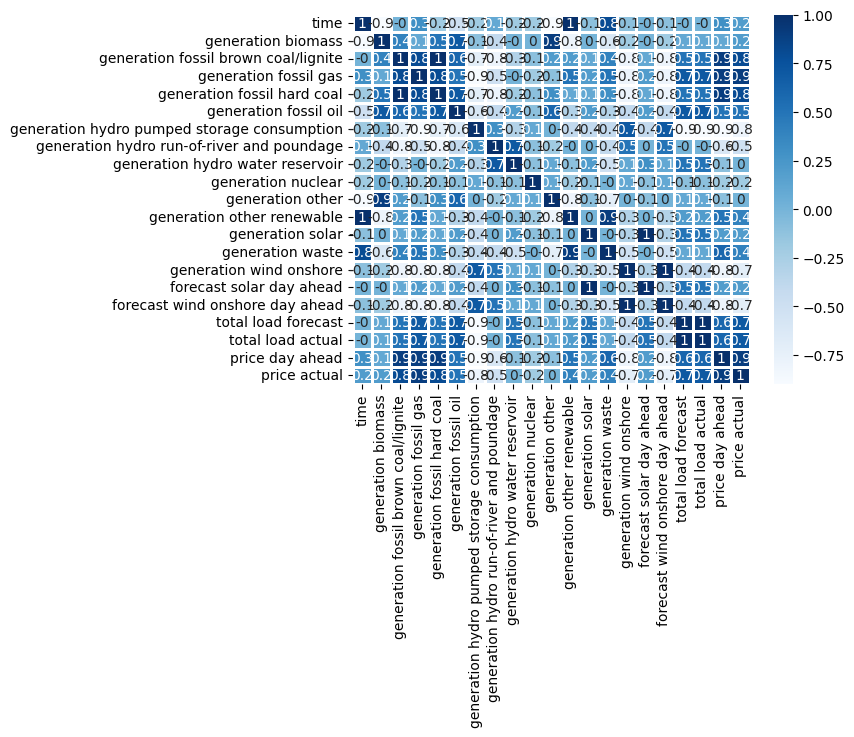

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
        
# .corr heatmap of energyDF to visualize correlation & show plot
sns.heatmap(round(correlations.corr(),1),annot=True,cmap='Blues',linewidth=0.9)
plt.show()

<Axes: xlabel='price actual', ylabel='Count'>

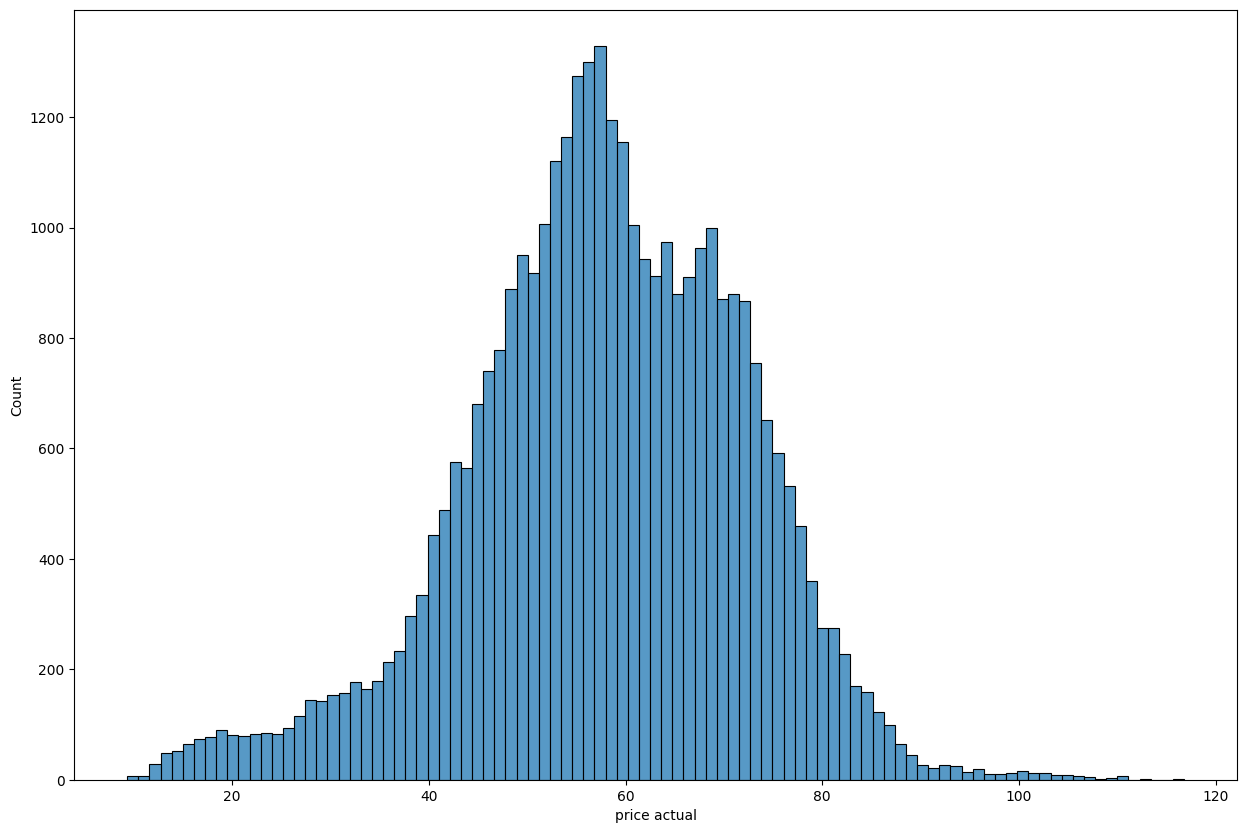

In [32]:
# Figure Size
plt.figure(figsize=(15,10))

# Hist graph to show distribution of target variable
sns.histplot(energyDF1,x='price actual')

### Data Wrangling

In [33]:
import numpy as np
# Read in the data, parse dates, and set the index
    # Assuming df is your DataFrame and 'time' is the column with dates
        #energyDF['time'] = pd.to_datetime(energyDF['time'])
        #energyDF.set_index('time', inplace=True)

energyDF['time'] = pd.to_datetime(energyDF['time'], utc=True)
        # Convert 'time' column to Unix timestamp
#energyDF['time'] = energyDF['time'].apply(lambda x: x.timestamp())
energyDF.set_index('time', inplace=True)
 
    # Rename columns by replacing all - or blank space with _
energyDF.columns = energyDF.columns.str.replace(' ','_').str.replace('-','_')

        # Make the index DT
energyDF.index = pd.to_datetime(energyDF.index, utc=True)    

    # Drop all columns with data leakage, or 90% + null
energyDF.drop(columns=['price_day_ahead',
                     'generation_marine',
                     'total_load_forecast',
                     'generation_geothermal',
                     'generation_fossil_peat',
                     'generation_wind_offshore',
                     'forecast_solar_day_ahead',
                     'generation_fossil_oil_shale',
                     'forecast_wind_onshore_day_ahead',
                     'forecast_wind_offshore_eday_ahead',
                     'generation_fossil_coal_derived_gas',
                     'generation_hydro_pumped_storage_aggregated'],inplace=True)
    
    # Drop Outlier row 2014 for plotting
energyDF = energyDF.drop(pd.Timestamp('2014-12-31 23:00:00+00:00')) 
    
    # Sort index
energyDF = energyDF.sort_index()
    
    # Set conditional satements for filtering times of month to season value
condition_winter = (energyDF.index.month>=1)&(energyDF.index.month<=3)
condtion_spring = (energyDF.index.month>=4)&(energyDF.index.month<=6)
condition_summer = (energyDF.index.month>=7)&(energyDF.index.month<=9)
condition_autumn = (energyDF.index.month>=10)@(energyDF.index.month<=12)
    
    # Create column in dataframe that inputs the season based on the conditions created above
energyDF['season'] = np.where(condition_winter,'winter',
                            np.where(condtion_spring,'spring',
                                     np.where(condition_summer,'summer',
                                              np.where(condition_autumn,'autumn',np.nan))))

energyDF.head(5)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual,season
time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,winter
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,winter
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,winter
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,winter
2015-01-01 04:00:00+00:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,53.63,winter


In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///energystorm.sqlite')
energyDF.to_sql("energy", engine, if_exists='replace',index=False)


In [ ]:
print('Sample data read from energy data')
df_read = pd.read_sql('SELECT * FROM energy', engine)
df_read.head(5)

### Price per Total Load

In [34]:
import plotly.express as px
        # Plot price actual vs total load
        # Figure showing Price per total load
fig = px.scatter(energyDF,x='total_load_actual',
                 y='price_actual',
                 facet_col='season',
                 opacity=0.1,
                 title='Price Per KW Hour Compared To Total Energy Genereated Per Season',
                 animation_frame=energyDF.index.year)

        # Figure customizations
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='darkslateblue')),
                  selector=dict(mode='markers'))